In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Import necessary libraries for handling imbalance and model tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

Step 1: Load Dataset

In [3]:

data = pd.read_csv("E:\\job related docs\\Feyann LAB\\heart_disease_uci.csv")  # Replace with actual dataset path
print("Dataset Loaded Successfully!")
print(data.head())

Dataset Loaded Successfully!
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4      

 Step 2: Data Preprocessing

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [9]:
# Check for null values
print("Null Values in Data:")
print(data.isnull().sum())

Null Values in Data:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [40]:
# Handle Missing Values
# Fill missing numerical values with mean (for simplicity)
data['trestbps'] = data['trestbps'].fillna(data['trestbps'].mean())
data['chol'] = data['chol'].fillna(data['chol'].mean())
data['thalch'] = data['thalch'].fillna(data['thalch'].mean())
data['oldpeak'] = data['oldpeak'].fillna(data['oldpeak'].mean())
data['ca'] = data['ca'].fillna(data['ca'].mean())



In [42]:
# Handle categorical columns with mode (most frequent value)
data['fbs'] = data['fbs'].fillna(data['fbs'].mode()[0])
data['restecg'] = data['restecg'].fillna(data['restecg'].mode()[0])
data['exang'] = data['exang'].fillna(data['exang'].mode()[0])
data['slope'] = data['slope'].fillna(data['slope'].mode()[0])
data['thal'] = data['thal'].fillna(data['thal'].mode()[0])


In [44]:
# Check again for null values
print("Null Values after Imputation:")
print(data.isnull().sum())

Null Values after Imputation:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [46]:
# Basic statistics
print("Dataset Statistics:")
print(data.describe())

Dataset Statistics:
               id         age         sex     dataset          cp    trestbps  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean   460.500000   53.510870    0.789130    1.238043    0.782609  132.132404   
std    265.725422    9.424685    0.408148    1.130673    0.956350   18.443895   
min      1.000000   28.000000    0.000000    0.000000    0.000000    0.000000   
25%    230.750000   47.000000    1.000000    0.000000    0.000000  120.000000   
50%    460.500000   54.000000    1.000000    1.000000    0.000000  130.000000   
75%    690.250000   60.000000    1.000000    2.000000    2.000000  140.000000   
max    920.000000   77.000000    1.000000    3.000000    3.000000  200.000000   

             chol         fbs     restecg      thalch       exang     oldpeak  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean   199.130337    0.345652    0.994565  137.545665    0.485870    0.878788   
std    

In [48]:
print(data.dtypes)

id            int64
age           int64
sex           int64
dataset       int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalch      float64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal          int64
num           int64
dtype: object


In [50]:
for col in ['sex', 'cp', 'restecg', 'slope', 'thal']:
    data[col] = LabelEncoder().fit_transform(data[col])

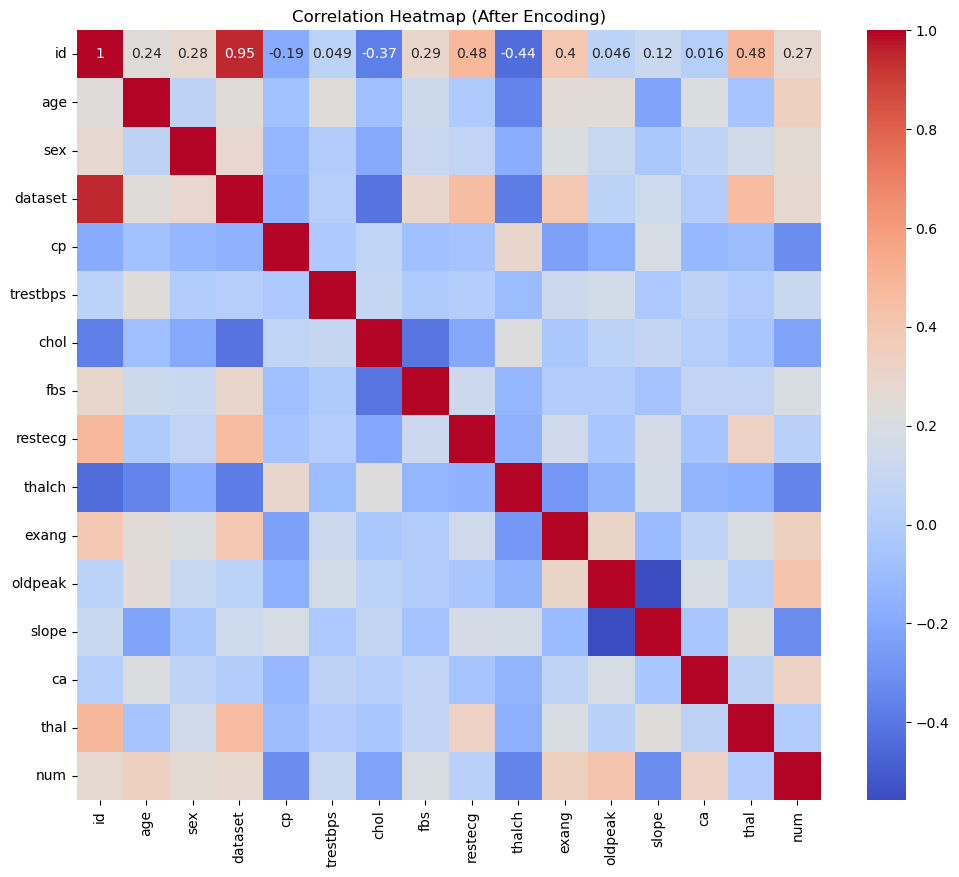

In [52]:
# Re-encode categorical columns if needed
encoded_data = data.select_dtypes(include=['number', 'bool'])

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (After Encoding)')
plt.show()


In [54]:
# Step 1: Check class distribution
print("Class distribution:")
print(data['num'].value_counts())

Class distribution:
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


Step 3: Model Building - Heart Disease Prediction

In [57]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['fbs'] = label_encoder.fit_transform(data['fbs'])
data['restecg'] = label_encoder.fit_transform(data['restecg'])
data['exang'] = label_encoder.fit_transform(data['exang'])
data['slope'] = label_encoder.fit_transform(data['slope'])
data['thal'] = label_encoder.fit_transform(data['thal'])
data['cp'] = label_encoder.fit_transform(data['cp'])
data['dataset'] = label_encoder.fit_transform(data['dataset'])

In [69]:
X = data.drop('num', axis=1)  # Features
y = data['num']  # Target variable

In [85]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [71]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [87]:
# Train-Test Split (80-20)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

In [89]:
from sklearn.ensemble import RandomForestClassifier

#  Random Forest Classifier with Class Weights Adjustment
rf = RandomForestClassifier(random_state=42, class_weight='balanced')  # Automatically adjusts weights based on class frequency

In [91]:
# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [93]:
#  Model Evaluation
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.2f}")

Random Forest Model Accuracy: 0.85


In [95]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        82
           1       0.83      0.66      0.73        82
           2       0.76      0.87      0.81        82
           3       0.87      0.89      0.88        83
           4       0.96      0.95      0.96        82

    accuracy                           0.85       411
   macro avg       0.85      0.85      0.85       411
weighted avg       0.85      0.85      0.85       411



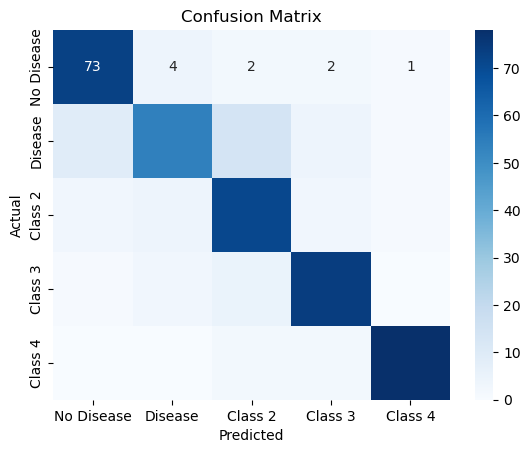

In [97]:
# Confusion matrix to see how well the model is predicting
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Disease', 'Disease', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['No Disease', 'Disease', 'Class 2', 'Class 3', 'Class 4'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
#  Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             verbose=2)

Financial Modelling in INR

In [106]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [108]:
# Step 1: Market Identification
# Here we are assuming the product will be launched in the Subscription-based Business market
# (e.g., SaaS, Streaming Services, etc.)

In [112]:
# Step 2: Collecting Data (Example Dataset of Subscriptions and Revenue)
market_data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'Subscriptions': [100, 200, 250, 300, 350, 400, 500, 550, 600, 650, 700, 750],
    'Revenue': [20000, 45000, 60000, 75000, 90000, 105000, 130000, 145000, 160000, 175000, 190000, 210000]
}

df_market = pd.DataFrame(market_data)

In [114]:
# Step 3: Revenue Forecasting using Linear Regression

# X represents the subscriptions and y represents the revenue
X_market = df_market['Subscriptions'].values.reshape(-1, 1)
y_market = df_market['Revenue']

# Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_market, y_market)

# Predict future revenue (for next 6 months)
future_subscriptions = np.array([800, 850, 900, 950, 1000, 1050]).reshape(-1, 1)
predicted_revenue = regressor.predict(future_subscriptions)

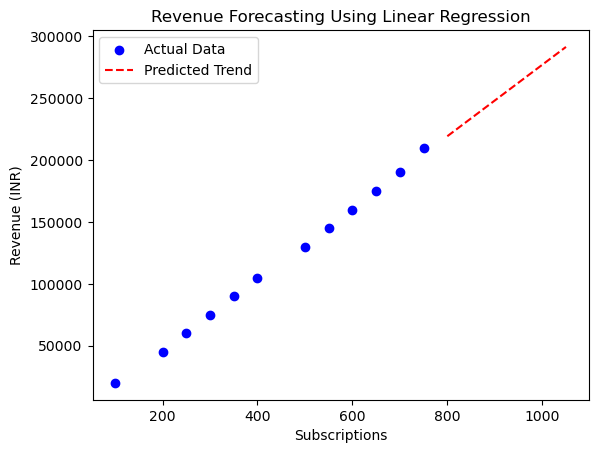

In [116]:
# Visualization of predicted revenue and actual data
plt.scatter(X_market, y_market, color='blue', label='Actual Data')
plt.plot(future_subscriptions, predicted_revenue, color='red', linestyle='--', label='Predicted Trend')
plt.xlabel('Subscriptions')
plt.ylabel('Revenue (INR)')
plt.title('Revenue Forecasting Using Linear Regression')
plt.legend()
plt.show()

In [118]:
# Revenue Equation from Linear Regression Model
print(f"Revenue Equation: y = {regressor.coef_[0]:.2f}x + {regressor.intercept_:.2f}")

# Predicted Revenue for future subscriptions
for subs, revenue in zip(future_subscriptions.flatten(), predicted_revenue):
    print(f"Predicted Revenue for {subs} subscriptions: ₹{revenue:,.2f}")


Revenue Equation: y = 288.54x + -11558.36
Predicted Revenue for 800 subscriptions: ₹219,275.33
Predicted Revenue for 850 subscriptions: ₹233,702.44
Predicted Revenue for 900 subscriptions: ₹248,129.54
Predicted Revenue for 950 subscriptions: ₹262,556.65
Predicted Revenue for 1000 subscriptions: ₹276,983.75
Predicted Revenue for 1050 subscriptions: ₹291,410.86


In [128]:
# Step 4: Time Series Forecasting using Holt-Winters Exponential Smoothing (for Revenue)

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Convert the 'Revenue' column to float (if needed)
df_market['Revenue'] = df_market['Revenue'].astype(float)

# Use Exponential Smoothing without seasonal component
model = ExponentialSmoothing(df_market['Revenue'], trend='add', seasonal=None)


# Fit the model
model_fit = model.fit()

# Forecast the next 6 months' revenue
forecast = model_fit.forecast(steps=6)
print(forecast)


12    227975.093185
13    244975.090695
14    261975.088205
15    278975.085715
16    295975.083224
17    312975.080734
dtype: float64


C:\Users\SURABHI\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


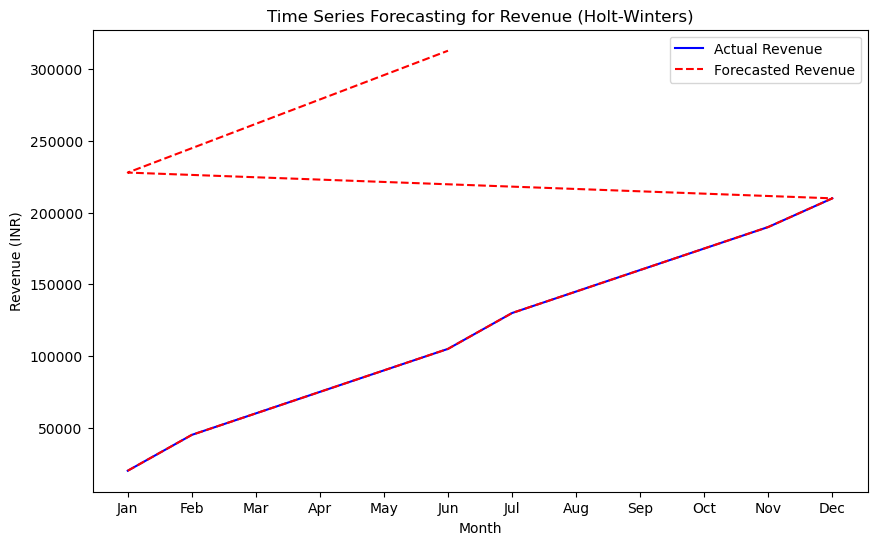

In [132]:
# Visualization of Time Series Forecasting
plt.figure(figsize=(10, 6))
plt.plot(df_market['Month'], df_market['Revenue'], label='Actual Revenue', color='blue')
plt.plot(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] + ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
         list(df_market['Revenue']) + list(forecast), label='Forecasted Revenue', color='red', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Revenue (INR)')
plt.title('Time Series Forecasting for Revenue (Holt-Winters)')
plt.legend()
plt.show()

In [134]:
# Financial Equation for predicted revenue

# Assuming unit cost = ₹500 per subscription, fixed cost = ₹200,000
unit_cost = 500
fixed_cost = 200000

# Calculating the revenue for the forecasted subscriptions
for subs, revenue in zip(future_subscriptions.flatten(), predicted_revenue):
    total_revenue = (unit_cost * subs * 12) - fixed_cost  # Revenue Calculation for 1 year
    print(f"Total Revenue for {subs} subscriptions in a year: ₹{total_revenue:,.2f}")


Total Revenue for 800 subscriptions in a year: ₹4,600,000.00
Total Revenue for 850 subscriptions in a year: ₹4,900,000.00
Total Revenue for 900 subscriptions in a year: ₹5,200,000.00
Total Revenue for 950 subscriptions in a year: ₹5,500,000.00
Total Revenue for 1000 subscriptions in a year: ₹5,800,000.00
Total Revenue for 1050 subscriptions in a year: ₹6,100,000.00


market segmentation

In [137]:
# Select relevant features for clustering (you can choose more or fewer based on your needs)
X = data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']]  # Example features for segmentation


In [139]:
# Scaling the data to bring all features to a comparable scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [141]:
# Apply KMeans clustering for market segmentation
kmeans = KMeans(n_clusters=5, random_state=42)  # You can change the number of clusters
data['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\SURABHI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SURABHI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


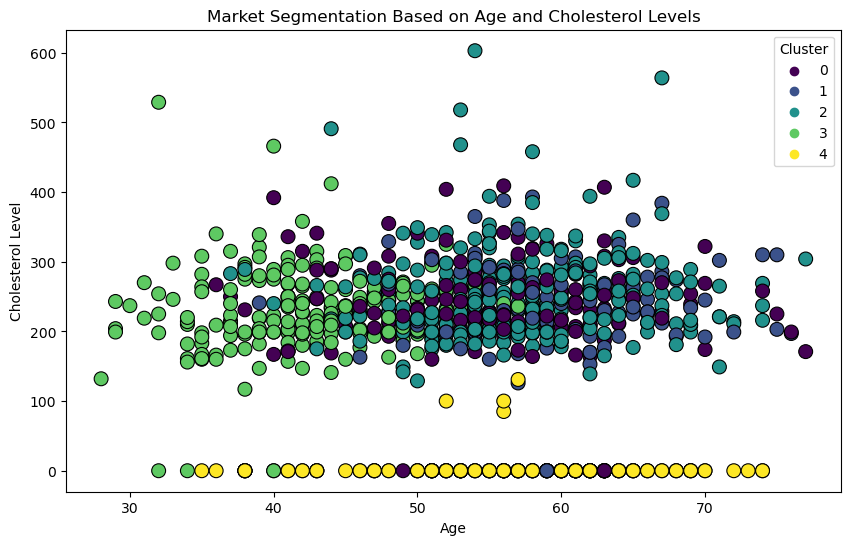

In [143]:
# Visualize the segments
plt.figure(figsize=(10, 6))

# Scatter plot with clusters
sns.scatterplot(x=data['age'], y=data['chol'], hue=data['Cluster'], palette='viridis', s=100, edgecolor='black')

# Add labels for better visualization
plt.title("Market Segmentation Based on Age and Cholesterol Levels")
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.legend(title="Cluster", loc='best')
plt.show()


In [153]:
import numpy
import pyyaml
import thinc
import blis



ModuleNotFoundError: No module named 'pyyaml'